#### Imports

##### Imports libraries and packages here or trought the code

#### Load the Data

##### Load the dataset, if using pandas `pd.read_csv(filename)` for example

#### Visualize

##### See the data and try find patterns. A helpfull function on pandas library is `df.Describe`

##### To visualize graphics use `matplotlib.pyplot` and `seaborn` libraries independently or together
##### Bellow you a see a `correlation matrix` wich can or can not be usefull since let you see very explicit existency of `linear` correlation between features

#### `CORRELATION MATRIX` as its fundamentals in the pearson correlation coeficient that measure the linear correlation betwen two variables in a scale from -1 to 1 the formula, denoted as R is: 

#   $\frac{\sum_{i=1}^{n} (x_{i}-x)*(y_{i}-y)}{\sqrt{\sum_{i=1}^{n} (x_{i}-x)^2}*\sqrt{\sum_{i=1}^{n}(y_{i}-y)^2}}$

In [194]:
df.describe()

Text(0.5, 1, 'Correlation matrix')

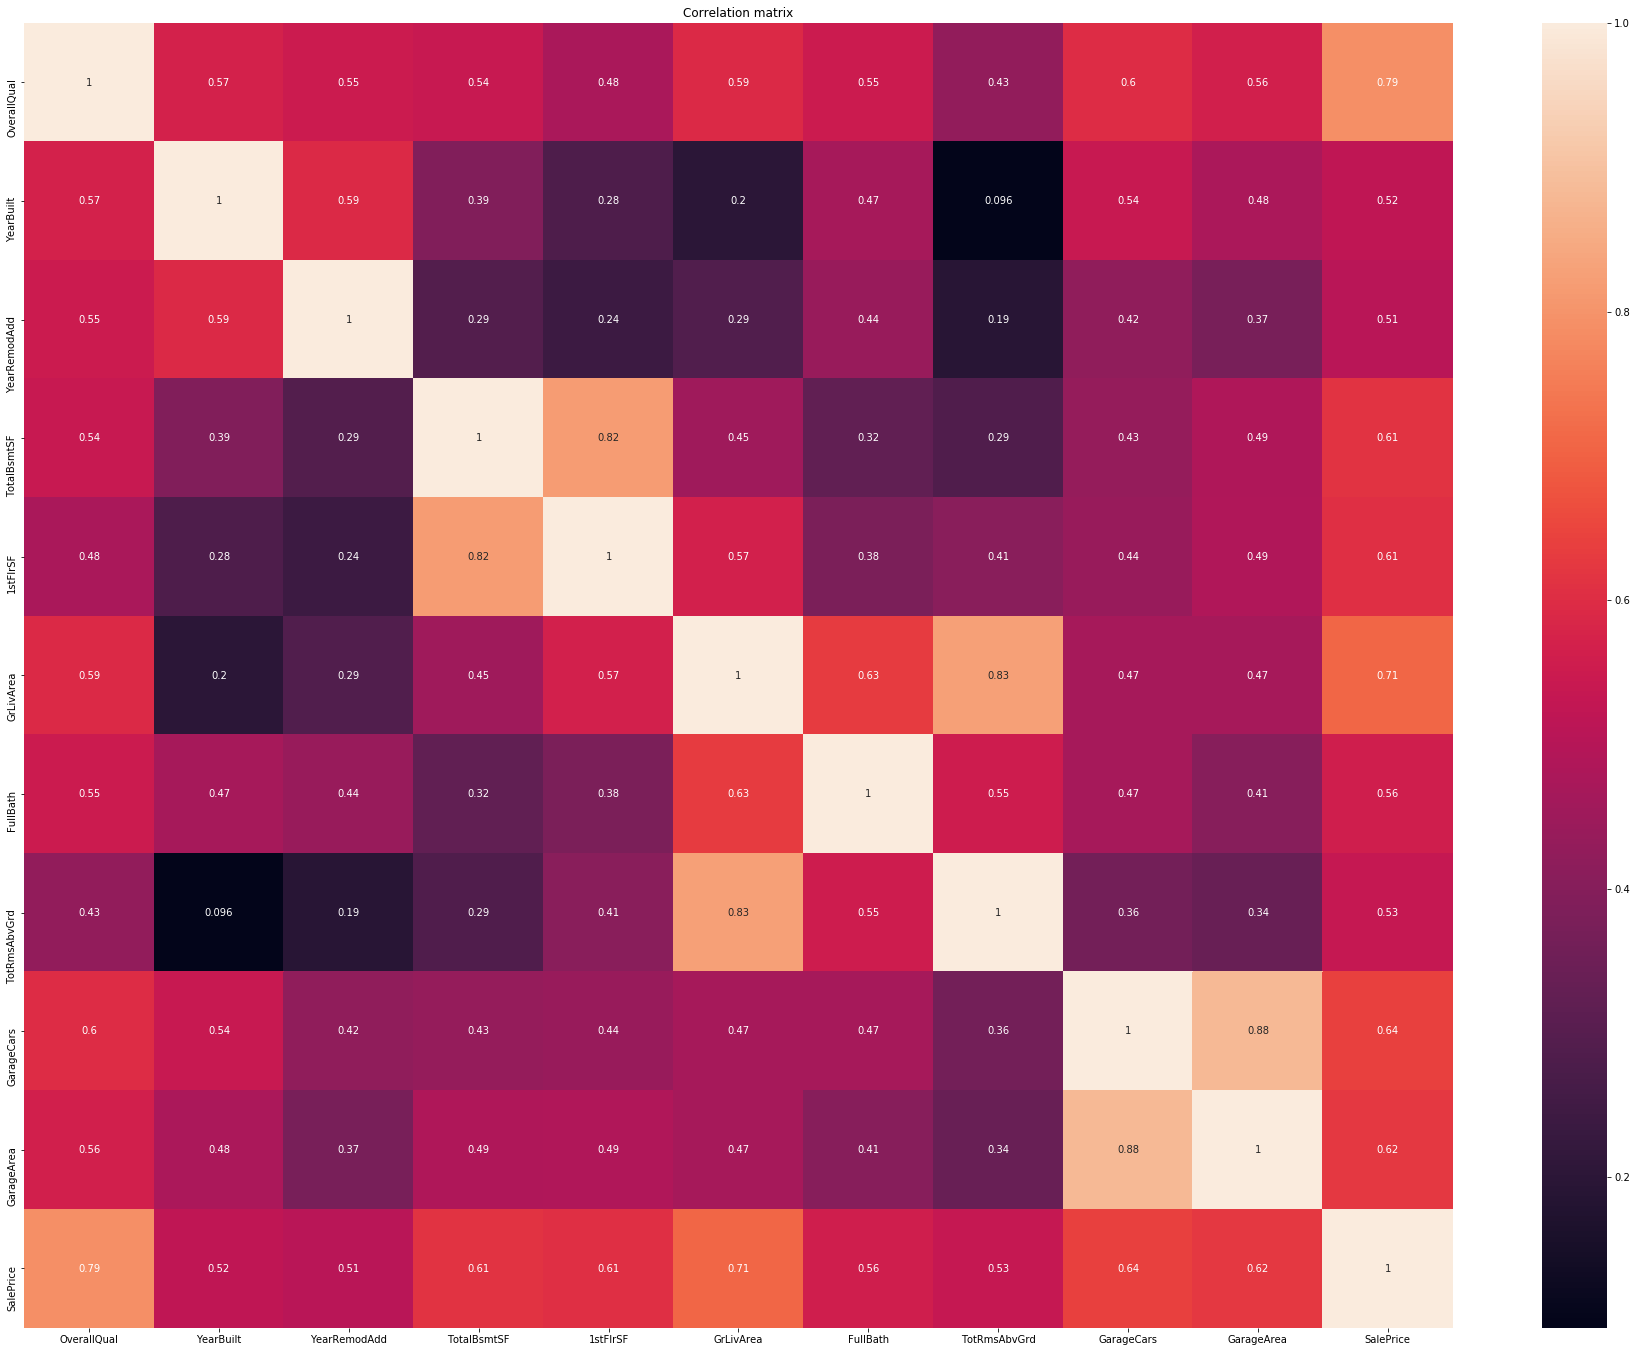

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (32, 24))
sns.heatmap(train.corr(), annot = True)
plt.title('Correlation matrix')

#### Feature Engineering

##### `The most important step`, Consist to produce new features by collect them from internet or from the existing data and add to main dataset, like `df.mean()`, `df.std()` or something more elaborate like:

#### Volume

##### In this example volume and force are agregated to a vector for better model interpretation

Text(0, 0.5, 'iVolumes')

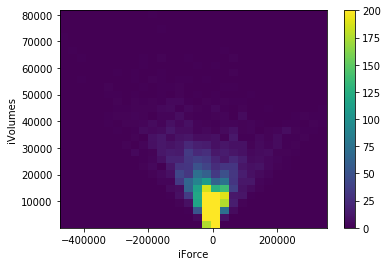

In [44]:
import matplotlib.pyplot as plt
import matplotlib as mlt

plt.hist2d(df['iForce'], df['iVolumes'], bins=(30, 30), vmax=200)
plt.colorbar()
plt.xlabel('iForce')
plt.ylabel('iVolumes')

In [45]:
import numpy as np

v = df['iVolumes']
v_rad = df['iForce']*np.pi / 180
df['Vx'] = v*np.cos(v_rad)
df['Vy'] = v*np.sin(v_rad)
df=df.drop(columns=['iVolumes','iForce','t_VOLUME'])

(-64790.15349197547, 57612.43991097653, -73228.4318218107, 62284.166339255564)

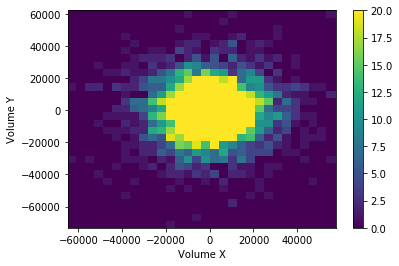

In [46]:
plt.hist2d(df['Vx'], df['Vy'], bins=(30, 30), vmax=20)
plt.colorbar()
plt.xlabel('Volume X')
plt.ylabel('Volume Y')
ax = plt.gca()
ax.axis('tight')

#### Time

Here transform time values in sin and cossine, witch is way better to model to interpret

In [47]:
df['t_DATE-TIME']=df['t_DATE']+" "+df['t_TIME']
df['t_DATE-TIME']
date_time = pd.to_datetime(df.pop('t_DATE-TIME'), format='%Y.%m.%d %H:%M')
df = df.drop(columns=['t_DATE', 't_TIME', 't_SEC'])
date_time

1       2020-08-10 09:06:00
2       2020-08-10 09:07:00
3       2020-08-10 09:08:00
4       2020-08-10 09:09:00
5       2020-08-10 09:10:00
                ...        
12447   2020-09-18 17:45:00
12448   2020-09-18 17:46:00
12449   2020-09-18 17:47:00
12450   2020-09-18 17:48:00
12451   2020-09-18 17:49:00
Name: t_DATE-TIME, Length: 12451, dtype: datetime64[ns]

In [48]:
import datetime
timestamp_s = date_time.map(datetime.datetime.timestamp)
timestamp_s

1        1.597061e+09
2        1.597061e+09
3        1.597061e+09
4        1.597061e+09
5        1.597061e+09
             ...     
12447    1.600462e+09
12448    1.600462e+09
12449    1.600462e+09
12450    1.600462e+09
12451    1.600462e+09
Name: t_DATE-TIME, Length: 12451, dtype: float64

In [49]:
day = 24*60*60
df['day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['day cos'] = np.cos(timestamp_s * (2 * np.pi / day))

Text(0.5, 1.0, 'time signal')

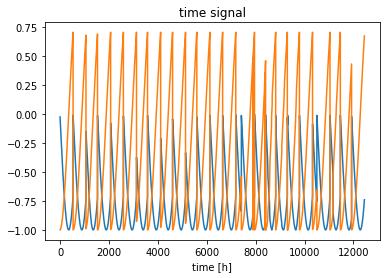

In [50]:
plt.plot(np.array(df['day sin'])[:])
plt.plot(np.array(df['day cos'])[:])
plt.xlabel('time [h]')
plt.title('time signal')

#### Cleaning the data

##### In this process we remove harmfull or irrelevant values and `Nan` away from the dataset

In [187]:
train=train[corr[corr > 0.5].dropna().index]
train

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125


In [219]:
y_true=train.pop('SalePrice')
id_=train.pop('Id')

In [220]:
import numpy as np
# set string values to number
def str_val_2_num(df):
    non_numerical=pd.DataFrame()
    for col in df.columns:
        if train[col].dtype == 'O':
            train[col].fillna(0)
            label=dict(zip(train[col].unique(),np.arange(len(train[col].unique()))))
            train[col]=[label[x] for x in train[col]]
            non_numerical[col]=train.pop(col)
    return non_numerical
non_num_val=str_val_2_num(train)
non_num_val

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,2,0,2,0,0,0,0,0,0,2,2,1,1,0,2,1,1,0,1,0,0,1,0,0,0,0,2,1,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1456,0,0,0,0,0,0,0,0,6,0,0,0,1,0,0,7,4,2,1,0,1,0,0,0,1,4,0,2,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0
1457,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,6,6,1,2,1,5,1,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,1,0,0
1458,0,0,0,0,0,0,0,0,11,0,0,0,1,1,0,1,1,1,1,0,1,1,0,2,0,4,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# normalize
def normalize(df):
    for col in df.columns:
        df[col]= (df[col]-df[col].mean()) / df[col].std()
def categorize(df):
    for col in df.columns:
        min_ = df[col].min()
        max_ = df[col].max()
        interval=(max_-min_)/10
        for index in range(len(df)):
            i=1
            for i in range(10):
                floor=min_+((i-1)*interval)
                roof=min_+(i*interval)
                if floor<=df.loc[index,col]<roof:
                        df.loc[index,col]=floor
                
normalize(train)
categorize(train)
train

In [ ]:
train=train.fillna(train.mean())
train.isnull().values.any()

#### Oversampling and undersampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE('minority')

train_X_squeeze=train_X.reshape(len(train_X),len(train_X[0]) * len(train_X[0][0]))
print(train_X_squeeze.shape)

In [ ]:
train_X_os, train_y_os = smote.fit_sample(train_X_squeeze, train_y)
print(train_X_os.shape, train_y_os.shape)

#### Train and test split

##### Here we divide the dataset in train dataset used for train the model and test a unseen data use to evaluate him, also acording to the model this division could be radom or not

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.values, y_true.values, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#### Define metrics and callbacks

##### Metrics are use to check how well the training is going and callbacks to stop training or change a train loop parameter when a predefine goal is reach

In [ ]:
import tensorflow as tf
from tensorflow import keras

METRICS = [
    tf.keras.metrics.MeanSquaredLogarithmicError(
    name='mean_squared_logarithmic_error', dtype=None
    )
]

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.0001):
      print("\nReached loss 0.0004 stop training")
      self.model.stop_training = True
        
#callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
def scheduler(epoch, lr):
  if epoch > 20:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

callbacks = myCallback()

#### Define the model

##### `Tensorflow model`

In [ ]:
output_bias = y_true.mean()
output_bias = tf.keras.initializers.Constant(output_bias)

model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(X_train[0].shape)),
    tf.keras.layers.LayerNormalization(),
    #tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dropout(0.1),
    #tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(32,kernel_regularizer=tf.keras.regularizers.L1(0.002),activity_regularizer=tf.keras.regularizers.L2(0.02)),
    tf.keras.layers.Dense(1, use_bias=True, bias_initializer=output_bias)
])

In [ ]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(lr=1e-2),
      loss='mae',
      metrics=METRICS)

##### `sklearn model`

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

3657965841232155.0


#### Train the model

In [ ]:
%%time
MAX_EPOCHS=600
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS,batch_size=32, validation_data=(X_test, y_test),verbose=2,shuffle=False, )

In [ ]:
%%time
history=lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)

#### Check the results

In [ ]:
model.summary()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [ ]:
mse_lr = cross_val_score(lr, X_test, y_test, scoring = 'neg_mean_squared_error', cv=10)
rmse_lr = np.sqrt(-mse_lr)
print(rmse_lr.mean())